# 응용하기

## 모듈

### if __name__=="__main__" 의미

In [6]:
import mod1 as m1

mod1


In [5]:
!python3 mod1.py

__main__
5
2


In [2]:
print(m1.add(3, 4))
print(m1.add(8, 4))
print(m1.sub(3, 4))
print(m1.sub(9, 3))

7
12
-1
6


In [4]:
from mod1 import add, sub
print(add(54,741))
print(sub(57,14))

795
43


In [3]:
m1.__name__

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add',
 'sub']

### 클래스나 변수 등을 포함한 모듈

In [6]:
import mod2
a = mod2.Math()
print(mod2.PI)
print(a.solv(10))

3.141592
314.1592


In [7]:
from mod2 import Math, PI
b = Math()
print(PI)
print(b.solv(10))

3.141592
314.1592


###  다른 디렉터리에 있는 모듈을 불러오는 방법

In [8]:
# %%sh
# mkdir ./mymod
# mv mod2.py ./mymod/mymod2.py # mv는 이동이지만 이름변경도 가능

In [5]:
import mymod2

In [2]:
import sys
# !pwd # /home/psy/data
# sys.path에 mymod2가 위치한 절대경로를 추가함.
sys.path.append("/home/psy/data/mymod/")
# sys.path.pop() # 가장 최근 경로 삭제

In [4]:
sys.path

['/usr/lib/python312.zip',
 '/usr/lib/python3.12',
 '/usr/lib/python3.12/lib-dynload',
 '',
 '/home/psy/venv/lib/python3.12/site-packages',
 '/home/psy/data/mymod/']

In [3]:
# PYTHONPATH 환경 변수 등 등록하여 사용가능함

### !python3 -V

## 패키지

In [2]:
# %%sh
# mkdir game
# mkdir game/sound
# mkdir game/graphic
# mkdir game/play

In [3]:
%%sh
echo "" > /home/psy/data/game/__init__.py
echo "" > /home/psy/data/game/sound/__init__.py
echo "" > /home/psy/data/game/graphic/__init__.py
echo "" > /home/psy/data/game/play/__init__.py

In [4]:
%%sh
echo "def echo_test():\n\tprint('echo')" > /home/psy/data/game/sound/echo.py
echo "def render_test():\n\tprint('render')" > /home/psy/data/game/graphic/render.py

### 패키지 안의 함수 실행하기

In [5]:
'''1'''
# import game.sound.echo
# game.sound.echo.echo_test()
'''2'''
# import game.sound.echo as ec
# ec.echo_test()
'''3'''
# from game.sound import echo
# echo.echo_test()
'''4'''
from game.sound.echo import echo_test
echo_test()

echo


In [6]:
f = open("/home/psy/data/game/__init__.py","w")
st = '''VERSION = 4.5

def print_version_info():
    print(f"The version of this game is {VERSION}.")
'''
f.write(st)
f.close()

In [1]:
import game
print(game.VERSION)
game.print_version_info()

4.5
The version of this game is 4.5.


###  패키지 내 모듈을 미리 import

In [2]:
st = '''from .graphic.render import render_test

VERSION = 4.6

def print_version_info():
    print(f"The version of this game is {VERSION}.")
'''
with open("/home/psy/data/game/__init__.py","w") as f:
    f.write(st)

In [1]:
import game
game.render_test()

render


### 패키지 초기화

In [7]:
st = '''from .graphic.render import render_test

VERSION = 4.7

def print_version_info():
    print(f"The version of this game is {VERSION}.")

print("Initializing game...")
'''
with open("/home/psy/data/game/__init__.py","w") as f:
    f.write(st)

In [1]:
import game

Initializing game...


In [1]:
from game.graphic.render import render_test

Initializing game...


### all(*)

In [2]:
from game.sound import *

Initializing game...


In [3]:
with open("/home/psy/data/game/sound/__init__.py","w") as f:
    f.write("__all__ = ['echo']")

In [4]:
echo.echo_test()

echo


### 상대경로 패키지

In [5]:
st = '''from game.sound.echo import echo_test
# from ..sound.echo import echo_test
def render_test():
    print("render")
    echo_test()
'''
with open("/home/psy/data/game/graphic/render.py","w") as f:
    f.write(st)

In [1]:
from game.graphic.render import render_test
render_test()

Initializing game...
render
echo


# 예외처리 *

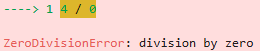

In [17]:
# except는 뒤에 나오는 구문을 생략할 수 있다
try:
    4 / 0
except ZeroDivisionError as e:
    print(e)

division by zero


In [18]:
# finally는 무조건 실행
try:
    4 / 0
except ZeroDivisionError as e:
    print(e)
finally:
    print("응?")

division by zero
응?


In [20]:
try:
    f = open('test2.txt','w') # 무언가를 수행
finally:
    f.close() # 중간에 오류 발생하더라도 무조건 실행
    print("파일을 열고 닫았습니다.")

파일을 열고 닫았습니다.


In [21]:
# 먼저 만나는 오류를 출력
try:
    a = [1,2]
    print(a[3])
    4/0
    print("나는 멋져")
except ZeroDivisionError as e:
    print("0으로 나눌 수 없습니다.", e)
except IndexError as e:
    print("인덱싱할 수 없습니다", e)

인덱싱할 수 없습니다 list index out of range


In [28]:
# try-else 문
try:
    age = int(input('나이를 입력하세요: '))
except:
    print('입력이 정확하지 않습니다.')
else:
    try:
        if age <= 18:
            print('미성년자는 출입금지입니다.')
        else:
            print('환영합니다.')
    except:
        print("프로그램 점검요망.")

나이를 입력하세요:  12


미성년자는 출입금지입니다.


In [30]:
# 오류 회피하기
students = ['김철수', '이영희', '박민수', '최유진']

for (i, student) in enumerate(students, 1):
    try:
        with open(f"{student}_성적.txt",'r') as f:
            score = f.read()
            print(f"{student}의 성적: {score}")
    except:
        print(f"{i}: {student}의 성적 파일이 없습니다. 건너뜁니다.")
        continue
        

1: 김철수의 성적 파일이 없습니다. 건너뜁니다.
2: 이영희의 성적 파일이 없습니다. 건너뜁니다.
3: 박민수의 성적 파일이 없습니다. 건너뜁니다.
4: 최유진의 성적 파일이 없습니다. 건너뜁니다.


In [38]:
class Bird:
    def fly(self):
        print("난다 날아~!")
        raise NotImplementedError("설정해주세요.")

In [39]:
a = Bird()
a.fly()

난다 날아~!


NotImplementedError: 설정해주세요.

In [40]:
class Eagle(Bird):
    def fly(self):
        print("난 진짜 난당~!")

In [41]:
e = Eagle()
e.fly()

난 진짜 난당~!


In [49]:
class MyError(Exception):
    def __str__(self): # 프린트 전용 구문
        return "나는 바보가 아니야! 멍청이야!"

In [50]:
def say_nick(nick):
    if nick == '바보':
        raise MyError()
    print(nick)

In [51]:
try:
    say_nick("천사")
    say_nick("바보")
except MyError as e:
    print(e)

천사
나는 바보가 아니야! 멍청이야!
